# CMS 2020 - Looking for Potential Problem Nodes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline

import csv
from os import path
from pathlib import Path

root_dir = Path().absolute()

In [2]:
# pre-cleaned dataset (all accounts)

accre_jobs_cleaned = pd.read_csv('../data/accre_jobs_cleaned.csv')
accre_jobs_cleaned

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,...,exitcode_error,used_mb_per_node,used_mb_per_core,reqmem_mc,reqmem_mn,reqmem_mn_per_core,reqmem_per_core,cluster_type_and_nodes,cluster_type,cluster_nodes
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,...,0,65973.49,2748.895417,NaN,122880.0,5120.0,5120.0,"('cn', '1531')",cn,1531
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,...,0,67181.12,2799.213333,NaN,122880.0,5120.0,5120.0,"('cn', '1441')",cn,1441
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,...,0,69111.86,2879.660833,NaN,122880.0,5120.0,5120.0,"('cn', '1464')",cn,1464
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,...,0,65317.33,2721.555417,NaN,122880.0,5120.0,5120.0,"('cn', '1473')",cn,1473
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,...,0,65876.11,2744.837917,NaN,122880.0,5120.0,5120.0,"('cn', '1440')",cn,1440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813177,24173815_6,portabella,vennie,32768Mn,23269.08M,1-00:00:00,00:01:36,1,2,production,...,0,23269.08,11634.540000,NaN,32768.0,16384.0,16384.0,"('cn', '432')",cn,432
3813178,24173815_7,portabella,vennie,32768Mn,20879.81M,1-00:00:00,00:01:37,1,2,production,...,0,20879.81,10439.905000,NaN,32768.0,16384.0,16384.0,"('cn', '440')",cn,440
3813179,24173815_8,portabella,vennie,32768Mn,30042.68M,1-00:00:00,00:02:27,1,2,production,...,0,30042.68,15021.340000,NaN,32768.0,16384.0,16384.0,"('cn', '312')",cn,312
3813180,24173815_9,portabella,vennie,32768Mn,31067.75M,1-00:00:00,00:02:27,1,2,production,...,0,31067.75,15533.875000,NaN,32768.0,16384.0,16384.0,"('cn', '312')",cn,312


In [3]:
accre_jobs_cleaned.shape

(3813182, 24)

# Create CMS dataframe

In [4]:
cms_jobs = accre_jobs_cleaned[accre_jobs_cleaned['account'].str.contains('cms')]
cms_jobs

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,...,exitcode_error,used_mb_per_node,used_mb_per_core,reqmem_mc,reqmem_mn,reqmem_mn_per_core,reqmem_per_core,cluster_type_and_nodes,cluster_type,cluster_nodes
2125,17032244,cms,cmspilot,28000Mn,8320.07M,2-00:00:00,1-23:31:46,1,4,production,...,0,8320.07,2080.0175,NaN,28000.0,7000.000,7000.000,"('cn', '1205')",cn,1205
2126,17032568,cms,cmspilot,28000Mn,11954.84M,2-00:00:00,1-23:33:13,1,4,production,...,0,11954.84,2988.7100,NaN,28000.0,7000.000,7000.000,"('cn', '1492')",cn,1492
2127,17032569,cms,cmspilot,28000Mn,10498.84M,2-00:00:00,1-23:36:36,1,4,production,...,0,10498.84,2624.7100,NaN,28000.0,7000.000,7000.000,"('cn', '1497')",cn,1497
2128,17032916,cms,cmspilot,21875Mn,11728.02M,2-00:00:00,1-23:27:55,1,8,nogpfs,...,0,11728.02,1466.0025,NaN,21875.0,2734.375,2734.375,"('ng', '1037')",ng,1037
2129,17032920,cms,cmspilot,94451Mn,20659.08M,2-00:00:00,1-23:16:04,1,8,nogpfs,...,0,20659.08,2582.3850,NaN,94451.0,11806.375,11806.375,"('ng', '691')",ng,691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813137,24173661,cmsadmin,autocms,4096Mc,860.03M,12:00:00,00:03:50,1,1,production,...,0,860.03,860.0300,4096.0,NaN,4096.000,4096.000,"('cn', '394')",cn,394
3813138,24173686,cmsadmin,lcgadmin,2000Mn,0.09M,2-00:00:00,00:02:29,1,1,sam,...,0,0.09,0.0900,NaN,2000.0,2000.000,2000.000,"('generic', 'vm-cms-sam-pri')",generic,vm-cms-sam-pri
3813149,24173689,cmsadmin,lcgadmin,2000Mn,0.09M,2-00:00:00,00:02:11,1,1,sam,...,0,0.09,0.0900,NaN,2000.0,2000.000,2000.000,"('generic', 'vm-cms-sam-sec')",generic,vm-cms-sam-sec
3813150,24173711,cmsadmin,lcgadmin,2000Mn,0.09M,2-00:00:00,00:01:29,1,1,sam,...,0,0.09,0.0900,NaN,2000.0,2000.000,2000.000,"('generic', 'vm-cms-sam-pri')",generic,vm-cms-sam-pri


In [5]:
cms_jobs['partition'].value_counts()

production    649572
nogpfs        310405
sam            79151
debug           5599
pascal          1196
Name: partition, dtype: int64

In [6]:
cms_jobs = cms_jobs[~accre_jobs_cleaned['partition'].str.contains('debug')]

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [7]:
cms_jobs['partition'].value_counts()

production    649572
nogpfs        310405
sam            79151
pascal          1196
Name: partition, dtype: int64

In [8]:
cms_jobs['account'].value_counts()

cms            800857
cms_lowprio    135682
cmsadmin       102589
cms_gpu_acc      1196
Name: account, dtype: int64

In [9]:
cms_jobs['user'].value_counts()

cmslocal      491240
cmspilot      344710
lcgadmin       79177
uscmslocal     45691
c19pilot       45688
autocms        23438
tamekia         6813
erick           1816
meghann          602
lailah           410
magen            400
tomasa           216
tremaine          51
lavern            42
benjamine         25
vannie             2
clemens            2
minor              1
Name: user, dtype: int64

In [10]:
cms_auto = cms_jobs[(cms_jobs['user'] == 'cmslocal') | (cms_jobs['user'] == 'cmspilot')]
cms_auto['user'].value_counts()

cmslocal    491240
cmspilot    344710
Name: user, dtype: int64

In [11]:
cms_auto = cms_auto[['reqtime','usedtime','reqmem_mn','used_mb_per_node','cluster_type','cluster_nodes','nodes','exitcode_error','state']]
cms_auto

,reqtime,usedtime,reqmem_mn,used_mb_per_node,cluster_type,cluster_nodes,nodes,exitcode_error,state
2125,2-00:00:00,1-23:31:46,28000.0,8320.07,cn,1205,1,0,COMPLETED
2126,2-00:00:00,1-23:33:13,28000.0,11954.84,cn,1492,1,0,COMPLETED
2127,2-00:00:00,1-23:36:36,28000.0,10498.84,cn,1497,1,0,COMPLETED
2128,2-00:00:00,1-23:27:55,21875.0,11728.02,ng,1037,1,0,COMPLETED
2129,2-00:00:00,1-23:16:04,94451.0,20659.08,ng,691,1,0,COMPLETED
...,...,...,...,...,...,...,...,...,...
3812800,2-00:00:00,00:01:26,28000.0,20.39,cn,1471,1,0,COMPLETED
3812801,2-00:00:00,00:01:19,28000.0,6.24,cn,1471,1,0,COMPLETED
3812802,2-00:00:00,00:01:19,28000.0,6.23,cn,1534,1,0,COMPLETED
3812856,2-00:00:00,00:01:00,21875.0,6.23,ng,1080,1,0,COMPLETED


In [12]:
cms_jobs['exitcode_error'].value_counts()

0      1040279
9           44
125          1
Name: exitcode_error, dtype: int64

In [13]:
cms_auto['nodes'].value_counts()

1    835950
Name: nodes, dtype: int64

In [14]:
cms_auto_sample1000 = cms_auto.sample(n=1000)

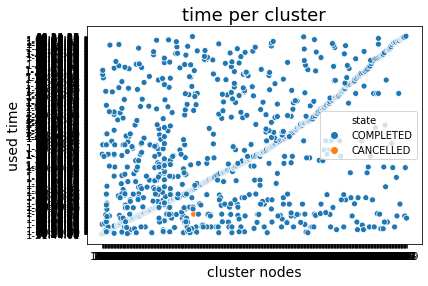

In [15]:
sns.scatterplot(data = cms_auto_sample1000, x = 'cluster_nodes', y = 'usedtime', hue = 'state');
plt.xlabel('cluster nodes', size = 14)
plt.ylabel('used time', size = 14)
plt.title('time per cluster', size=18);

In [16]:
cms_auto_10hr_sample1000 = cms_auto[~cms_auto['usedtime'].str.contains('-')]
cms_auto_10hr_sample1000 = cms_auto_10hr_sample1000[cms_auto_10hr_sample1000['usedtime'].str.contains('0?.??.??')].sample(n=1000)
cms_auto_10hr_sample1000

,reqtime,usedtime,reqmem_mn,used_mb_per_node,cluster_type,cluster_nodes,nodes,exitcode_error,state
780578,2-00:00:00,08:33:23,28000.0,3167.86,cn,1360,1,0,COMPLETED
145870,2-00:00:00,03:21:49,28000.0,10254.90,cn,1476,1,0,COMPLETED
3553747,2-00:00:00,00:20:04,186648.0,6.23,cn,1557,1,0,COMPLETED
2501674,2-00:00:00,07:45:49,5000.0,1665.00,cn,1391,1,0,COMPLETED
3136676,2-00:00:00,03:26:51,28000.0,6756.99,cn,1445,1,0,COMPLETED
...,...,...,...,...,...,...,...,...,...
3661772,2-00:00:00,02:24:16,28000.0,9060.48,cn,1294,1,0,COMPLETED
884516,2-00:00:00,00:00:42,21875.0,1.83,ng,1063,1,0,COMPLETED
957186,2-00:00:00,06:42:07,5000.0,2553.64,cn,1313,1,0,COMPLETED
968471,2-00:00:00,05:41:12,28000.0,8147.30,cn,1271,1,0,COMPLETED


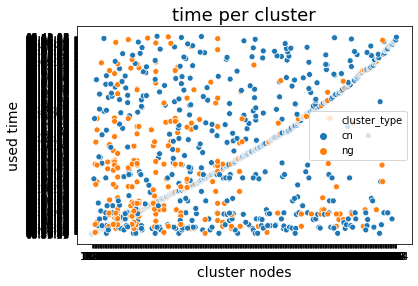

In [17]:
sns.scatterplot(data = cms_auto_10hr_sample1000, x = 'cluster_nodes', y = 'usedtime', hue = 'cluster_type');
plt.xlabel('cluster nodes', size = 14)
plt.ylabel('used time', size = 14)
plt.title('time per cluster', size=18);

In [18]:
cms_auto_1hr_sample1000 = cms_auto[~cms_auto['usedtime'].str.contains('-')]
cms_auto_1hr_sample1000 = cms_auto_1hr_sample1000[cms_auto_1hr_sample1000['usedtime'].str.contains('00.??.??')].sample(n=1000)
cms_auto_1hr_sample1000

,reqtime,usedtime,reqmem_mn,used_mb_per_node,cluster_type,cluster_nodes,nodes,exitcode_error,state
3586127,2-00:00:00,00:00:23,46071.0,0.00,ng,518,1,0,COMPLETED
740613,2-00:00:00,00:00:06,28000.0,0.00,cn,1237,1,0,COMPLETED
3662169,2-00:00:00,00:20:03,28000.0,6.24,cn,1472,1,0,COMPLETED
2757710,2-00:00:00,00:02:33,28000.0,15.08,cn,1211,1,0,COMPLETED
3683931,2-00:00:00,00:20:16,5000.0,6.23,cn,1308,1,0,COMPLETED
...,...,...,...,...,...,...,...,...,...
3778441,2-00:00:00,00:00:43,5000.0,0.00,cn,1434,1,0,COMPLETED
2611329,2-00:00:00,00:20:37,21875.0,1.82,ng,1021,1,0,COMPLETED
3764378,2-00:00:00,00:21:26,21875.0,13.88,ng,1068,1,0,COMPLETED
3353708,2-00:00:00,00:00:24,46071.0,0.00,ng,518,1,0,COMPLETED


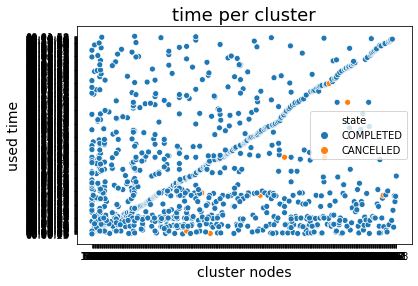

In [19]:
sns.scatterplot(data = cms_auto_1hr_sample1000, x = 'cluster_nodes', y = 'usedtime', hue = 'state');
plt.xlabel('cluster nodes', size = 14)
plt.ylabel('used time', size = 14)
plt.title('time per cluster', size=18);

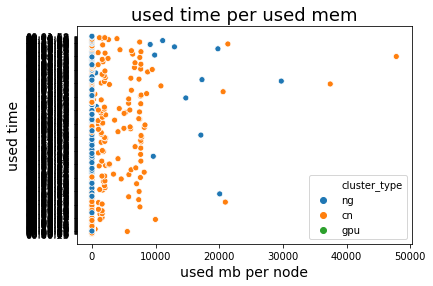

In [20]:
sns.scatterplot(data = cms_auto_1hr_sample1000, x = 'used_mb_per_node', y = 'usedtime', hue = 'cluster_type');
plt.xlabel('used mb per node', size = 14)
plt.ylabel('used time', size = 14)
plt.title('used time per used mem', size=18);

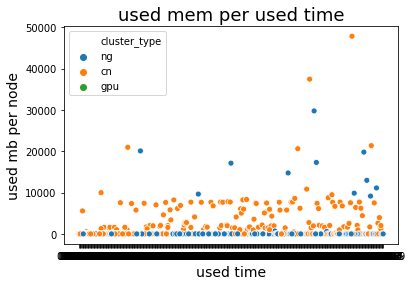

In [21]:
sns.scatterplot(data = cms_auto_1hr_sample1000, x = 'usedtime', y = 'used_mb_per_node', hue = 'cluster_type');
plt.xlabel('used time', size = 14)
plt.ylabel('used mb per node', size = 14)
plt.title('used mem per used time', size=18);

In [22]:
cms_auto_failed = cms_auto[cms_auto['state'] == 'FAILED']
cms_auto_failed

,reqtime,usedtime,reqmem_mn,used_mb_per_node,cluster_type,cluster_nodes,nodes,exitcode_error,state
8629,2-00:00:00,00:01:11,186648.0,1.78,cn,1554,1,0,FAILED
8632,2-00:00:00,00:01:26,186648.0,8.38,cn,1544,1,0,FAILED
22234,2-00:00:00,00:02:35,21875.0,11310.72,ng,909,1,0,FAILED
197972,2-00:00:00,00:01:32,186648.0,1.82,cn,1581,1,0,FAILED
197973,2-00:00:00,00:01:53,186648.0,1.79,cn,1563,1,0,FAILED
...,...,...,...,...,...,...,...,...,...
2194734,2-00:00:00,00:01:05,28000.0,6420.60,cn,1536,1,0,FAILED
2505543,2-00:00:00,00:01:55,28000.0,12175.01,cn,1523,1,0,FAILED
2505544,2-00:00:00,00:01:56,28000.0,14505.71,cn,1523,1,0,FAILED
3259530,2-00:00:00,00:01:07,21878.0,14938.52,ng,739,1,0,FAILED


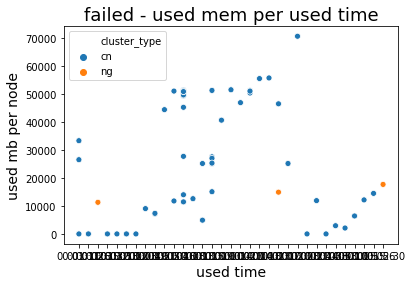

In [23]:
sns.scatterplot(data = cms_auto_failed, x = 'usedtime', y = 'used_mb_per_node', hue = 'cluster_type');
plt.xlabel('used time', size = 14)
plt.ylabel('used mb per node', size = 14)
plt.title('failed - used mem per used time', size=18);

In [24]:
cms_failed_1hr = cms_auto_failed[~cms_auto_failed['usedtime'].str.contains('-')]
cms_failed_1hr = cms_failed_1hr[cms_failed_1hr['usedtime'].str.contains('00.??.??')]
cms_failed_1hr

,reqtime,usedtime,reqmem_mn,used_mb_per_node,cluster_type,cluster_nodes,nodes,exitcode_error,state
8629,2-00:00:00,00:01:11,186648.0,1.78,cn,1554,1,0,FAILED
8632,2-00:00:00,00:01:26,186648.0,8.38,cn,1544,1,0,FAILED
22234,2-00:00:00,00:02:35,21875.0,11310.72,ng,909,1,0,FAILED
197972,2-00:00:00,00:01:32,186648.0,1.82,cn,1581,1,0,FAILED
197973,2-00:00:00,00:01:53,186648.0,1.79,cn,1563,1,0,FAILED
...,...,...,...,...,...,...,...,...,...
2194734,2-00:00:00,00:01:05,28000.0,6420.60,cn,1536,1,0,FAILED
2505543,2-00:00:00,00:01:55,28000.0,12175.01,cn,1523,1,0,FAILED
2505544,2-00:00:00,00:01:56,28000.0,14505.71,cn,1523,1,0,FAILED
3259530,2-00:00:00,00:01:07,21878.0,14938.52,ng,739,1,0,FAILED


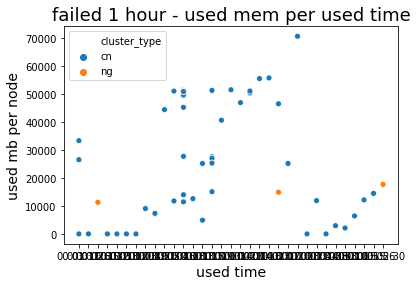

In [25]:
sns.scatterplot(data = cms_failed_1hr, x = 'usedtime', y = 'used_mb_per_node', hue = 'cluster_type');
plt.xlabel('used time', size = 14)
plt.ylabel('used mb per node', size = 14)
plt.title('failed 1 hour - used mem per used time', size=18);

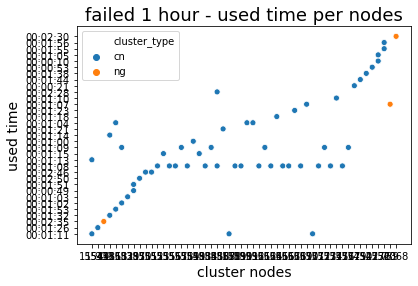

In [26]:
sns.scatterplot(data = cms_failed_1hr, x = 'cluster_nodes', y = 'usedtime', hue = 'cluster_type');
plt.xlabel('cluster nodes', size = 14)
plt.ylabel('used time', size = 14)
plt.title('failed 1 hour - used time per nodes', size=18);

In [27]:
cms_failed_1hr['cluster_nodes'].value_counts()

1387    3
1536    2
1554    2
1523    2
1586    2
1581    2
1563    2
1582    2
1544    1
1567    1
1558    1
1564    1
1572    1
1585    1
739     1
1559    1
1579    1
1571    1
1450    1
1592    1
1573    1
1552    1
1557    1
1566    1
1574    1
1588    1
1569    1
1562    1
909     1
1568    1
1555    1
1553    1
1550    1
1583    1
1277    1
1589    1
1539    1
1551    1
1542    1
1570    1
1576    1
1549    1
1591    1
1565    1
1575    1
1590    1
1068    1
1556    1
1587    1
1577    1
1584    1
1561    1
Name: cluster_nodes, dtype: int64

# Questions?